/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2: Silhouette score=0.171,  WCSS=92015.957, Precision=0.957, Recall=0.670


/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=3: Silhouette score=0.151,  WCSS=84994.184, Precision=0.957, Recall=0.416


/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=4: Silhouette score=0.166,  WCSS=79029.915, Precision=0.957, Recall=0.337


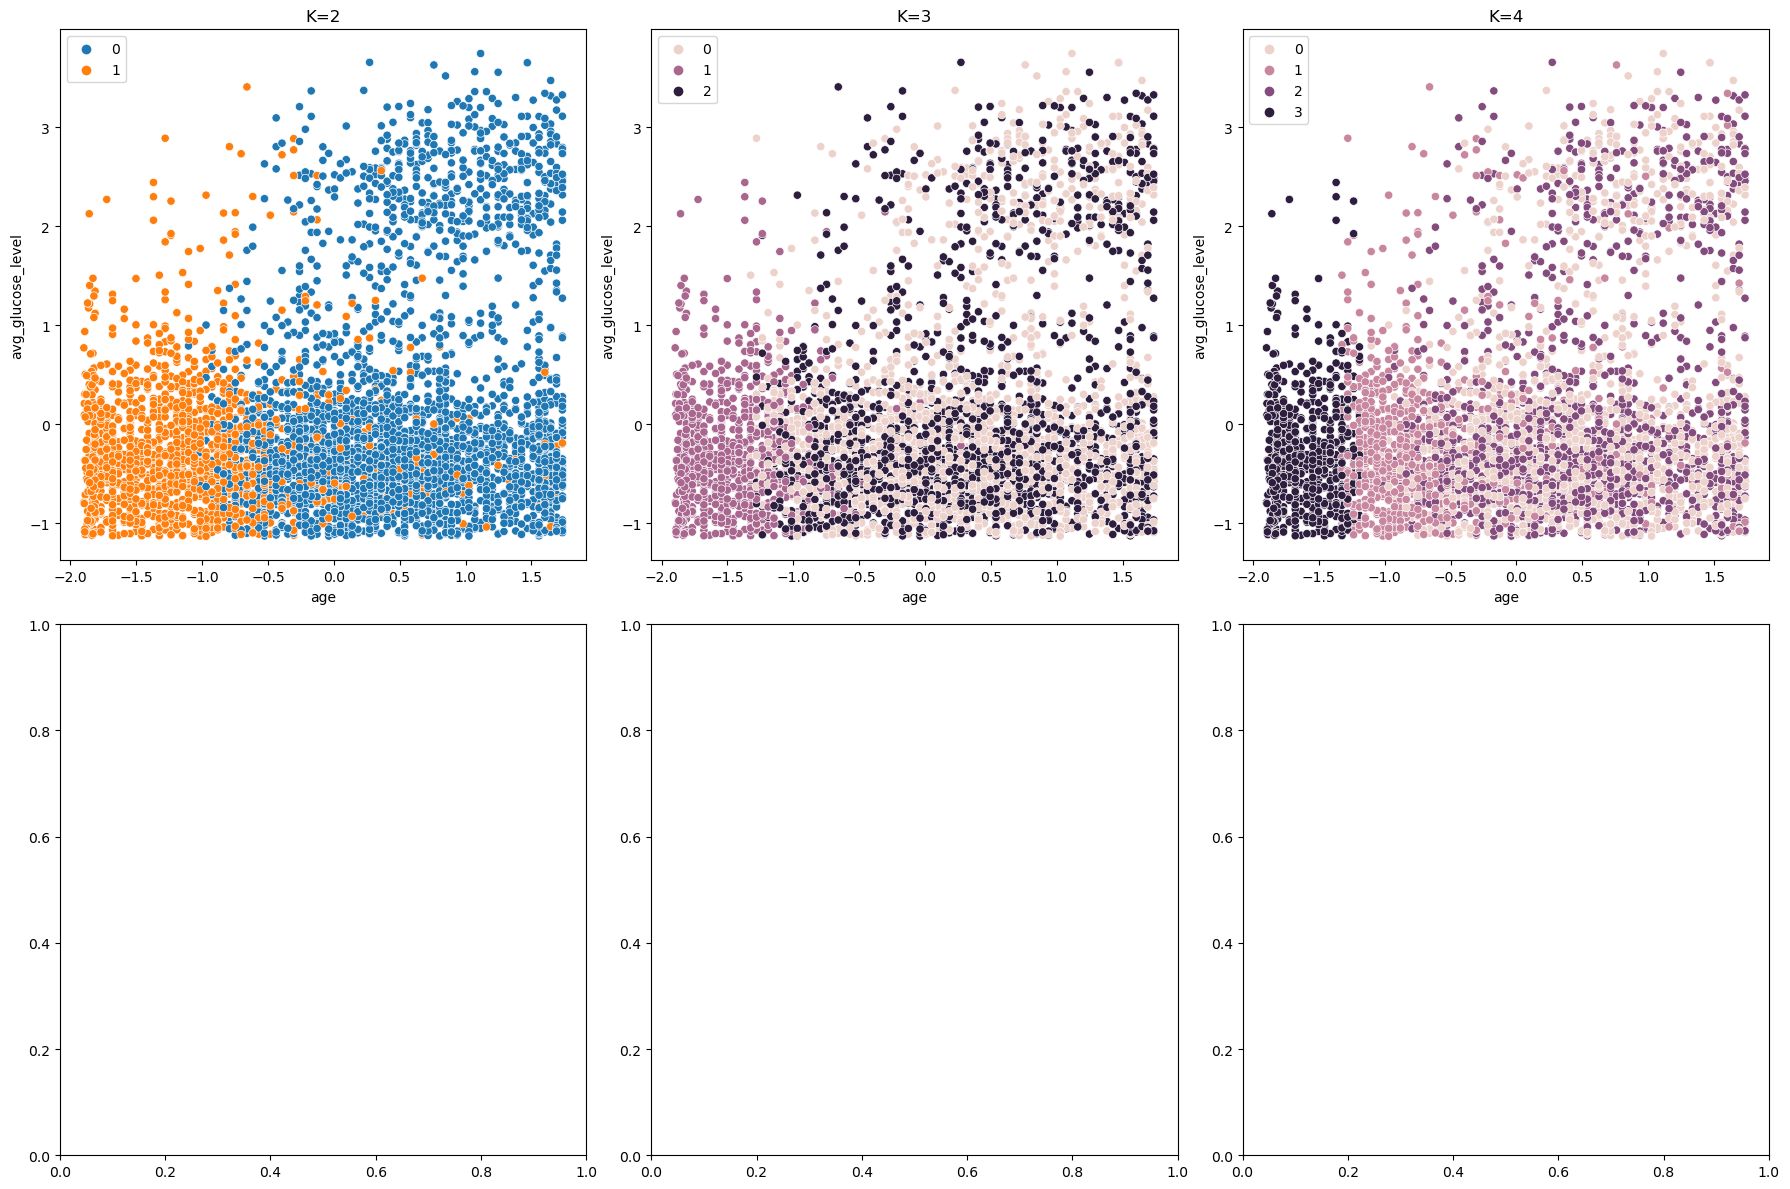

In [146]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics.cluster import contingency_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data = pd.concat([data, pd.get_dummies(data['gender'], prefix='gender')], axis=1)
data = data.drop(['gender'], axis=1) # Remove the original 'gender' column
data = pd.concat([data, pd.get_dummies(data['ever_married'], prefix='ever_married')], axis=1)
data = data.drop(['ever_married'], axis=1) # Remove the original 'ever_married' column
data = pd.concat([data, pd.get_dummies(data['work_type'], prefix='work_type')], axis=1)
data = data.drop(['work_type'], axis=1) # Remove the original 'work_type' column
data = pd.concat([data, pd.get_dummies(data['Residence_type'], prefix='residence_type')], axis=1)
data = data.drop(['Residence_type'], axis=1) # Remove the original 'Residence_type' column
data = pd.concat([data, pd.get_dummies(data['smoking_status'], prefix='smoking_status')], axis=1)
data = data.drop(['smoking_status'], axis=1) # Remove the original 'smoking_status' column
data = data.dropna() 
# Drop the ID column as it is not useful for clustering
data.drop('id', axis=1, inplace=True)

# Normalize the data
data = (data - data.mean()) / data.std()

# Define a list of K values to try
k_values = [2, 3, 4]

# Create a figure to plot the results
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Run K-means clustering for each K value and plot the results
for i, k in enumerate(k_values):
    # Create a KMeans object with the current K value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data
    kmeans.fit(data)
    
    # Compute evaluation metrics
    sil_score = silhouette_score(data, kmeans.labels_)
    db_score = davies_bouldin_score(data, kmeans.labels_)
    wcss = kmeans.inertia_
    
    # Compute contingency matrix forBCubed precision and recall
    c_matrix = contingency_matrix(data['stroke'], kmeans.labels_)
    precision = c_matrix.max(axis=0).sum() / c_matrix.sum()
    recall = c_matrix.max(axis=1).sum() / c_matrix.sum()
    
    # Print the evaluation metrics for the current K value
    print(f"K={k}: Silhouette score={sil_score:.3f},  WCSS={wcss:.3f}, Precision={precision:.3f}, Recall={recall:.3f}")
    
    # Plot the results for the current K value
    row = i // 3
    col = i % 3
    sns.scatterplot(data=data, x='age', y='avg_glucose_level', hue=kmeans.labels_, ax=axs[row, col])
    axs[row, col].set_title(f"K={k}")

plt.tight_layout()
plt.show()

In [147]:
#Create a label encoder object
encoder = LabelEncoder()

In [148]:
# Fill missing values with the median
data = data.fillna(data.median())

In [149]:
# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [150]:
# Compute within-cluster sum of squares for different values of K
k_values = range(2, 11)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

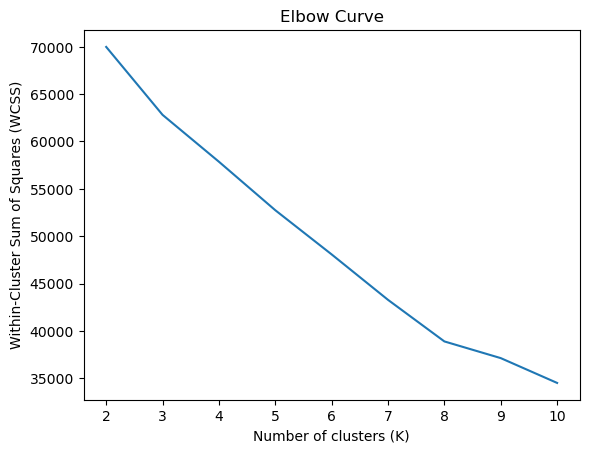

In [151]:
# Plot elbow curve
plt.plot(k_values, wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [152]:
# Compute silhouette score for different values of K
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jourialanazi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

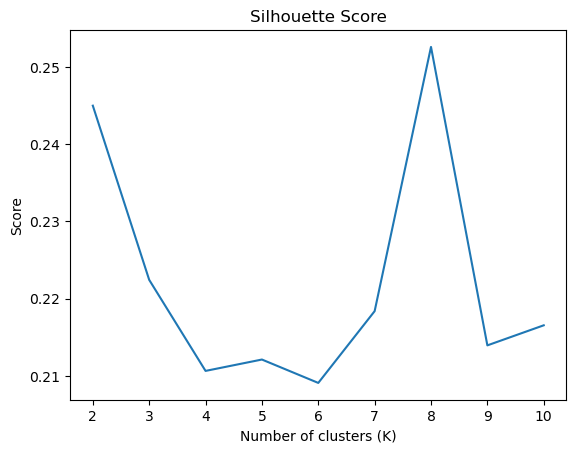

In [153]:
# Plot silhouette score
plt.plot(k_values, silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Score')
plt.show()

k= 2 shilhouette score =0.171 ‏ k= 3shilhouette score =0.151 ‏ k= 4 shilhouette score =0.166 ‏ k= 2 WCSS =92015.957 ‏ k= 3 WCSS =84994.184 ‏ k= 4 WCSS =79029.915 ‏ k= 2 precision =0.957 ‏ k= 3 precision =0.957 ‏ k= 4 precision =0.957 ‏ k= 2 Recall =0.670 ‏ k= 3 Recall =0.416 ‏ k= 4 Recall =0.337

The best choice for clustering based on the given results is k=2 because:

1. Silhouette score: The silhouette score for k=2 is higher than that of k=3 and k=4. The silhouette score measures how well the data points are separated into clusters. A higher silhouette score indicates better separation between clusters. Therefore, the higher silhouette score for k=2 indicates that the clustering results are more compact and well-separated for k=2.

2. Within-cluster sum of squares (WCSS): The WCSS decreases as k increases, but the rate of decrease slows down after k=3. A lower WCSS indicates that the data points are closer to their respective centroids. Therefore, the lower WCSS for k=2 suggests that the data points are more tightly clustered around their respective centroids for k=2.

3. Precision: The precision metric is the same for all values of k, indicating that there is no clear difference in the accuracy of the clustering results.

4. Recall: The recall metric decreases as k increases, which suggests that the clustering results become less accurate as more clusters are added.

Overall, the combination of a higher silhouette score and a lower WCSS for k=2 suggest that this value of k provides better clustering results than k=3 or k=4. Therefore, k=2 would be the most appropriate choice for this clustering task.